In [20]:
import mglearn 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
# 마이너스 깨짐 방지
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

#한글꺠짐 방지
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 어떤 데이터셋이 사라집니다 같은 문구 뺴고 오류만 출력시키는거 
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

w[0]: 0.393906  b: -0.031804


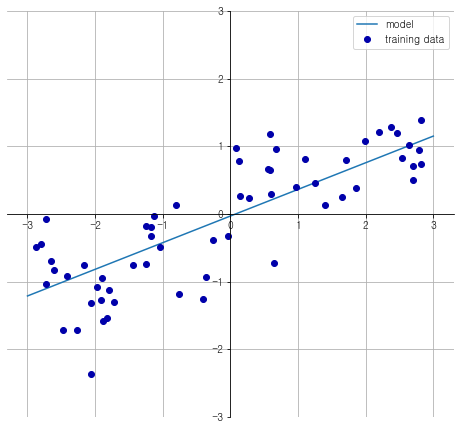

In [2]:
mglearn.plots.plot_linear_regression_wave()

# 선형 회귀(최소제곱법)

In [5]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [6]:
print("lr.coef_:",lr.coef_)
print("lr.intercept_",lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_ -0.031804343026759746


In [7]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train,y_train)))
print("훈련 세트 점수: {:.2f}".format(lr.score(X_test,y_test)))


훈련 세트 점수: 0.67
훈련 세트 점수: 0.66


In [8]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [10]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test,y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


# 리지 회귀

In [12]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [13]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))


훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [15]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test,y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


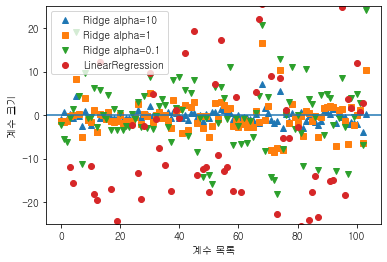

In [18]:
plt.plot(ridge10.coef_,'^',label='Ridge alpha=10')
plt.plot(ridge.coef_,'s',label='Ridge alpha=1')
plt.plot(ridge01.coef_,'v',label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()


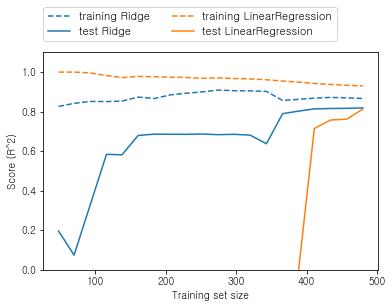

In [19]:
mglearn.plots.plot_ridge_n_samples()

# 라소 회귀

In [21]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso.coef_ != 0))


훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


In [23]:
lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ != 0))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


In [26]:
lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


(-25.0, 25.0)

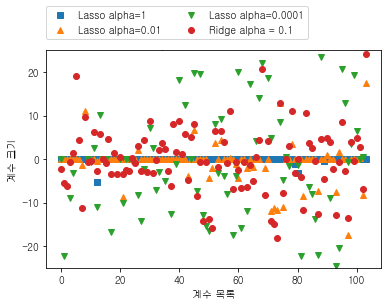

In [27]:
plt.plot(lasso.coef_,'s',label='Lasso alpha=1')
plt.plot(lasso001.coef_,'^',label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_,'v',label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha = 0.1')
plt.legend(ncol=2,loc=(0,1.05))
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.ylim(-25,25)


# 분류용 선형 모델

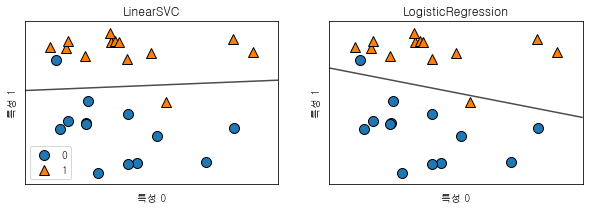

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2,figsize=(10,3))

for model,ax in zip([LinearSVC(max_iter=5000),LogisticRegression()],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1],y,ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

    

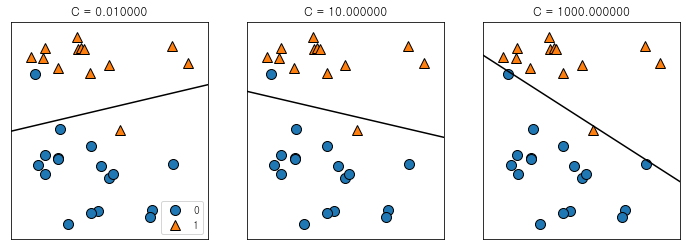

In [30]:
mglearn.plots.plot_linear_svc_regularization()

In [32]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수:{:.3f}".format(logreg.score(X_train,y_train)))
print("테스트 세트 점수:{:.3f}".format(logreg.score(X_test,y_test)))


훈련 세트 점수:0.958
테스트 세트 점수:0.958


In [33]:
logreg100 = LogisticRegression(C=100,max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수:{:.3f}".format(logreg100.score(X_train,y_train)))
print("테스트 세트 점수:{:.3f}".format(logreg100.score(X_test,y_test)))

훈련 세트 점수:0.984
테스트 세트 점수:0.965


In [34]:
logreg001 = LogisticRegression(C=0.01,max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수:{:.3f}".format(logreg001.score(X_train,y_train)))
print("테스트 세트 점수:{:.3f}".format(logreg001.score(X_test,y_test)))

훈련 세트 점수:0.953
테스트 세트 점수:0.951


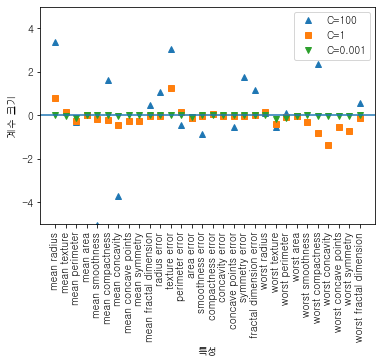

In [37]:
plt.plot(logreg100.coef_.T,'^',label='C=100')
plt.plot(logreg.coef_.T,'s',label='C=1')
plt.plot(logreg001.coef_.T,'v',label='C=0.001')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()


C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


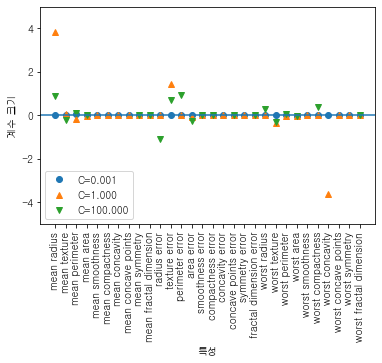

In [42]:
# L1 규제 로지스틱 회귀

for C, marker in zip([0.001,1,100],['o','^','v']):
    lr_l1 = LogisticRegression(solver='liblinear',C=C,penalty="l1",max_iter=1000).fit(X_train,y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C,lr_l1.score(X_train,y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(C,lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5,5)
plt.legend(loc=3)


# 다중 클래스 분류용 선형 모델

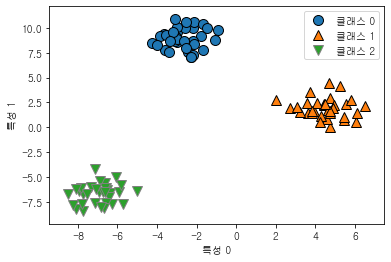

In [43]:
from sklearn.datasets import make_blobs

X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])


In [46]:
# linearsvc

linear_svm = LinearSVC().fit(X,y)
print("계수 배열의 크기:", linear_svm.coef_.shape)
print("절편 배열의 크기:", linear_svm.intercept_.shape)


계수 배열의 크기: (3, 2)
절편 배열의 크기: (3,)


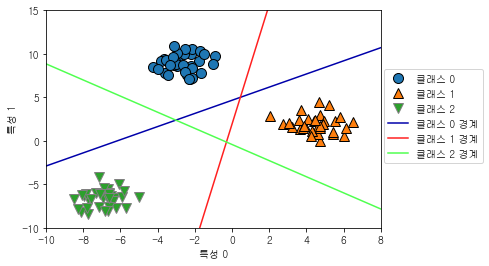

In [49]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1],c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0","클래스 1","클래스 2","클래스 0 경계","클래스 1 경계","클래스 2 경계"], loc=(1.01,0.3))


Text(0, 0.5, '특성 1')

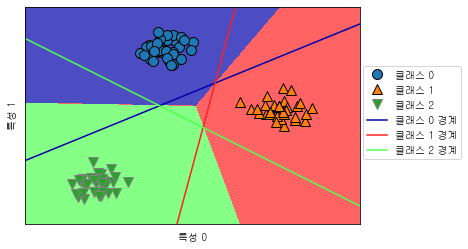

In [51]:
mglearn.plots.plot_2d_classification(linear_svm,X,fill=True,alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1],c=color)

plt.legend(["클래스 0","클래스 1","클래스 2","클래스 0 경계","클래스 1 경계","클래스 2 경계"], loc=(1.01,0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [52]:
#메서드 연결 가능 

logreg = LogisticRegression().fit(X_train,y_train)

In [54]:
logreg = LogisticRegression()
y_pred = logreg .fit(X_train,y_train).predict(X_test)


In [56]:
# 비권장
y_pred = LogisticRegression().fit(X_train,y_train).predict(X_test)